# **Problem Statement**

**Which Factors Influence the Price of Health Insurance?**

In recent years, owing to the rising cost of medical treatment, there has been a significant rise in the number of people buying a health insurance policy. People are going beyond individual policies and are buying policies for their family to ensure they have a financial cushion in case of an emergency. Health insurance not only covers you during your difficult times but also offers you tax benefits.



While approving your insurance application, the insurance companies generally conduct a thorough assessment of your health profile. Based on their review, they fix the premium charges.



In this Project we will try to predict the premimum Charges using Regression Analysis and find out which of the features mostly influence the premium Charges.

**Undestanding the Dataset**

The dataset which is collected from Kaggle, have the undermentioned columns:

•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

•	Charges: How much he charged for his medical insurance?












**Importing the Required Libraries**



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the Dataset**

In [ ]:
#importing the dataset
from google.colab import files
uploaded = files.upload()

Saving Medical_insurance.csv to Medical_insurance.csv


In [ ]:
import io
dataset=pd.read_csv(io.BytesIO(uploaded['Medical_insurance.csv']))

In [ ]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


**Overview of our dataset**

To check the number of columns and Rows in our dataset:

In [ ]:

dataset.shape

(2772, 7)

We have 2772 rows and 7columns in our dataset.

Checking for Null values In our dataset

In [ ]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So, no null values are present in our dataset.

In [ ]:
dataset.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


## **Visualisation:**


Now let's look at the charges by region

<ipython-input-9-487fe10b89c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues')


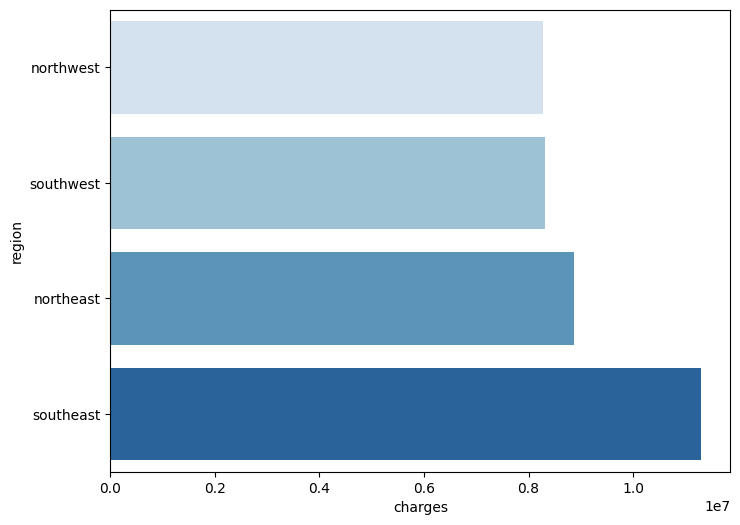

In [ ]:

charges = dataset['charges'].groupby(dataset.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region.

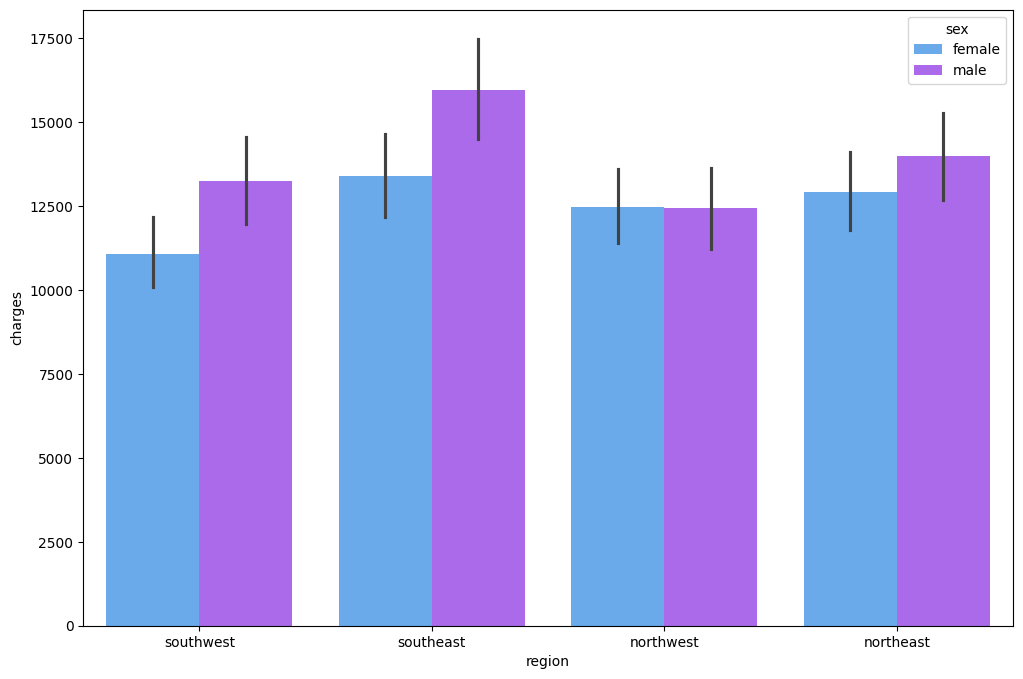

In [ ]:


f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=dataset, palette='cool')


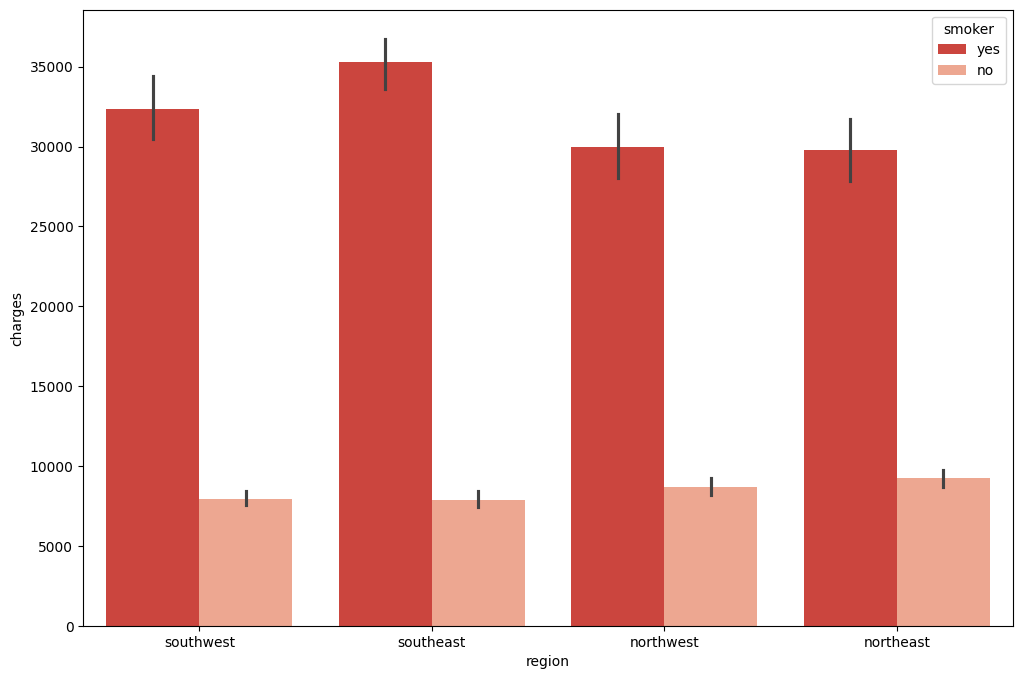

In [ ]:

f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=dataset, palette='Reds_r')

**Findings from the Visualisation:** As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall.

Now let's analyze the medical charges by age, bmi and children according to the smoking factor

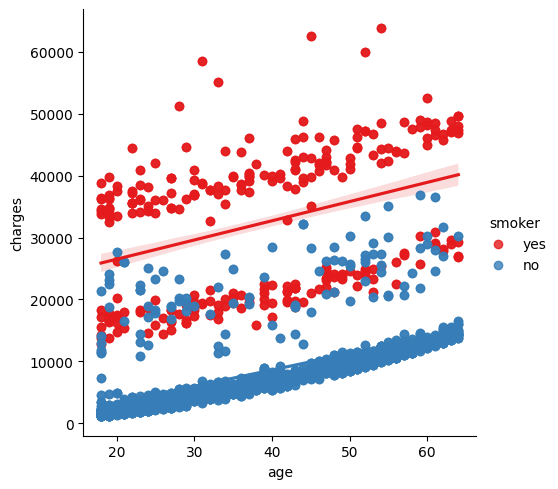

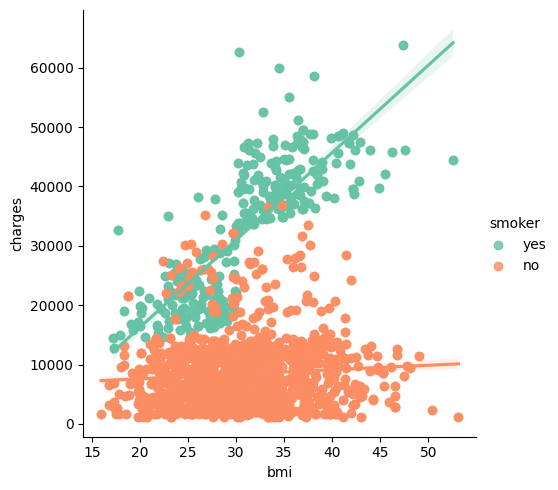

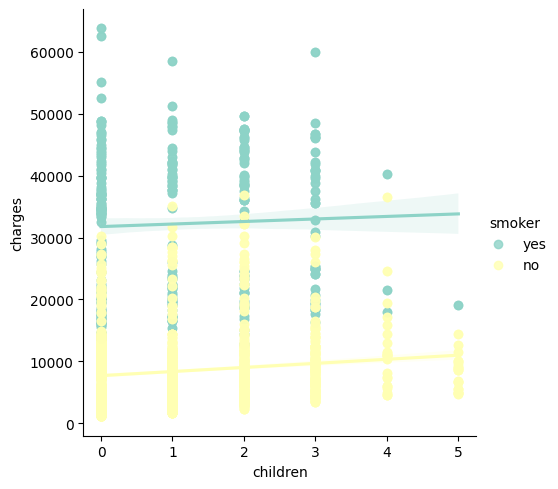

In [ ]:

ax = sns.lmplot(x = 'age', y = 'charges', data=dataset, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=dataset, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=dataset, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less.

Dividing the Independent Variables and Dependent Variables

In [ ]:
X = dataset.iloc[:, :-1] # Independent Variable
y = dataset.iloc[:, -1] # Dependent Variable

# **Correlation Heatmap between variables**

<ipython-input-14-12c55eb6ccdf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


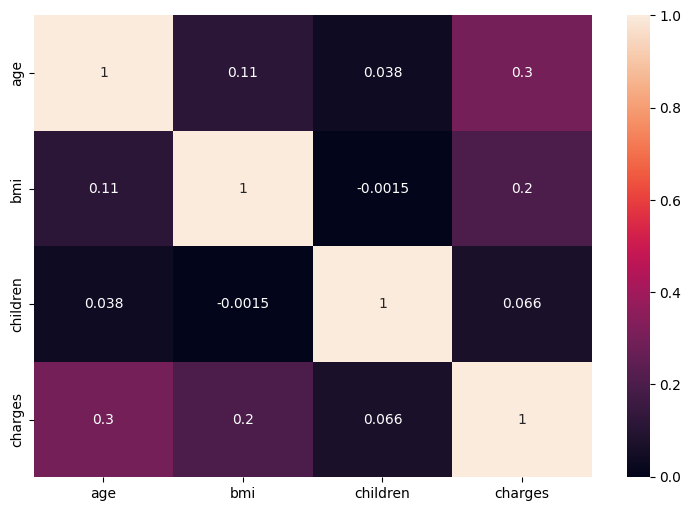

In [ ]:

plt.figure(figsize=(9,6))
sns.heatmap(dataset.corr(),annot=True)
plt.show()


There is no such Correlation present between the variables.


## **Distribution of Target Variable(y) i.e. Charges**

<ipython-input-15-cd0da265eb14>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset['charges'], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribution of Charges')

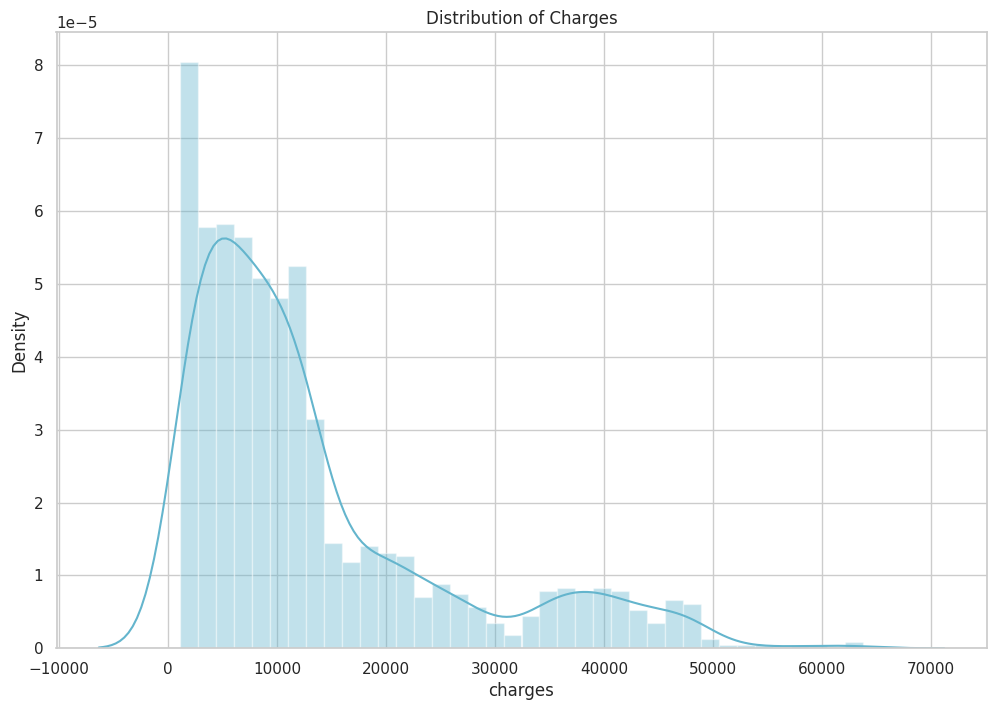

In [ ]:

sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(dataset['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

We can observe that, the distribution of y is positively skewed.To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.

<ipython-input-16-a240cb59aea9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(dataset['charges']), kde = True, color = 'r' )


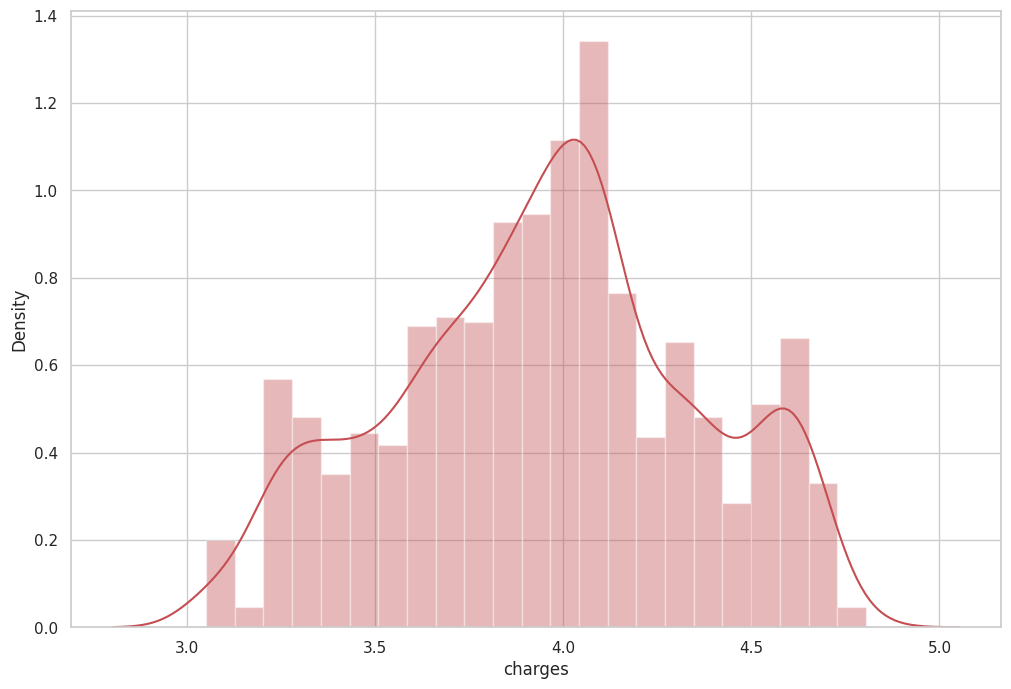

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(dataset['charges']), kde = True, color = 'r' )

After the Log transformation, we observed that, the distribution of y becomes symmteric. So we take the log transformation of our y variable.

In [ ]:

y=np.log10(y)

**Identifing the Numeric and Categorical Features**

In [ ]:


dataset.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# We have to apply encoding in the dataset as there are words present.
# for 'sex' and 'smoker' column we will apply Label Encoding as there are only 2 catagories
# for 'region' we will apply OneHot Encoding as there are more than 2 catagories and it is not a ordinal column



# Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:, 1] = le.fit_transform(X.iloc[:, 1])
X.iloc[:, 4] = le.fit_transform(X.iloc[:, 4])

# OneHot Encoding:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

<ipython-input-19-798fb0a689b7>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:, 1] = le.fit_transform(X.iloc[:, 1])
<ipython-input-19-798fb0a689b7>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:, 4] = le.fit_transform(X.iloc[:, 4])


# **Modeling on our Dataset**


**1. Multiple Linear Regression Model**

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:

X_test.shape

(555, 9)

In [ ]:

# Training the Model
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [ ]:

from sklearn.metrics import r2_score
y_pred1 = regressor1.predict(X_test)
r2_mlr=r2_score(y_test, y_pred1)
print("R2 :" ,r2_mlr)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred1)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7780701980647886
Adjusted R2 :  0.7744053022530145


In [ ]:

residuals=y_test-y_pred1


**Checking the Assumptions of the Linear Regressions:**

a. Homoscedasticity:

Heteroskedasticity refers to situations where the variance of the residuals is unequal over a range of measured values.
When running a regression analysis, heteroskedasticity results in an unequal scatter of the residuals.
A residual vs fitted plot can be used to assess whether data is homoscedatic in nature or not.
Goldfeld-Quandt Test can also be used to assess the same.


Goldfeld Quandt Test:

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic.

In [ ]:

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 1.0835330843146382), ('p-value', 0.2556899546427939)]

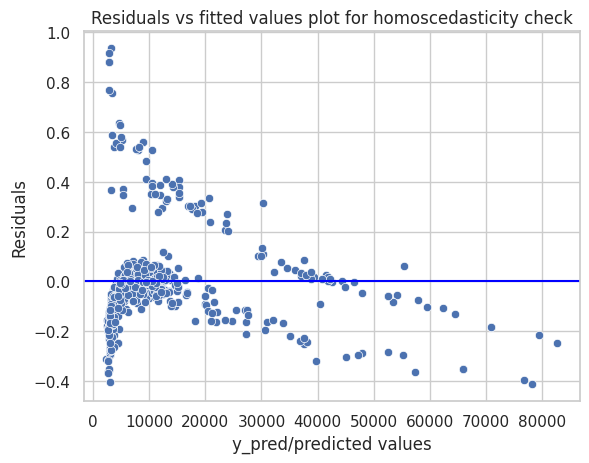

In [ ]:
p = sns.scatterplot(x=10**y_pred1, y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

plt.axhline(0, color='blue')
plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

So, we can conclude that that the residuals are homoscedastic in nature.

**b. Durbin-Watson Test for testing the Auto Correlation**

Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.

Autocorrelation measures the relationship between a variable's current value and its past values.

We use Durbin Watson test to measure the degree of autocorrelation. The Durbin Watson test reports a test statistic, with a value from 0 to 4.

 where:

2 is no autocorrelation.

Less than 2 is positive autocorrelation (common in time series data).

Greater than 2 is negative autocorrelation (less common in time series data)

A residual vs fitted plot can also be used to assess the autocorrelation in the data.

In [ ]:

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels
residuals = y_test - y_pred1
statsmodels.stats.stattools.durbin_watson(residuals)

2.006186660385007

The value of Durbin-Watson Test Statistics is 2.06, which is very close to 2. Therefore we can conclude that, there is a very insignificant amount of negative correlation present in the data.

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

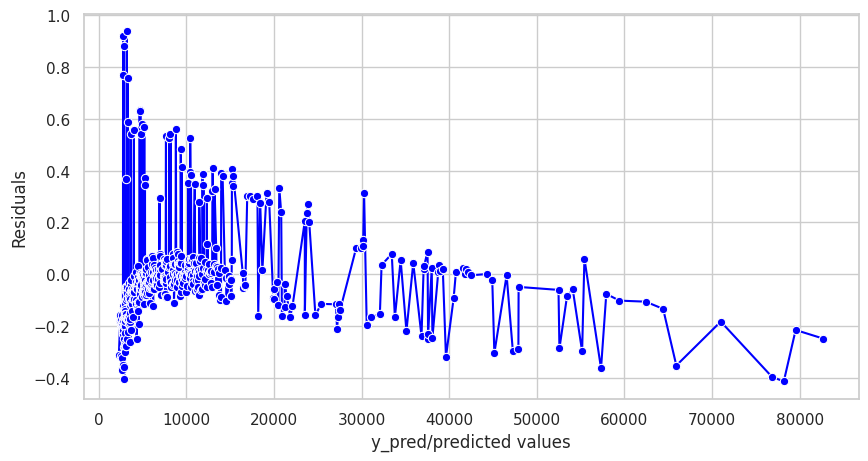

In [ ]:

x = 10**y_pred1
y = residuals
plt.figure(figsize=(10,5))
p = sns.lineplot(x=x,y=y,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
sns.lineplot([np.min(x),np.max(x)],[0,0],color='red')
plt.title('Residuals vs fitted values plot for autocorrelation check')


**c) Multicolinearity:**

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.

To measure multicollinearity among the independent features, we use VIF (Variance Inflation Factor).

If VIF< 4 then, No Multicolinearity present.

If VIF>= 4 then, Moderate Multicolinearity present.

If VIF>10 then, Severe Multicolinearity present.

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:



X_df = pd.DataFrame(X)
calc_vif(X_df[[i for i in X_df.describe().columns]])

,variables,VIF
0,0,8.416726
1,1,8.473450
2,2,11.702185
3,3,9.307607
4,4,1.018201
5,5,1.009875
6,6,1.114274
7,7,1.004017
8,8,1.013467


So, here we have a moderate Multicolinearity present in 'age' and 'bmi' variables. This could be a result of sample regression phenomenon of multicolinearity, which means even if X variables are not linearly related in population , they may be related in the sample in hand as we have only 2772 observations in our dataset.

Since the features 'age' and 'bmi' are very important to predict the premium charges, so we don't drop them as we have only six features in our hand.



**d) Test for Normality:**

Normality is the assumption that the underlying residuals are normally distributed, or approximately so.

We can use a Q-Q Plot to see whether our data is normally distributed.

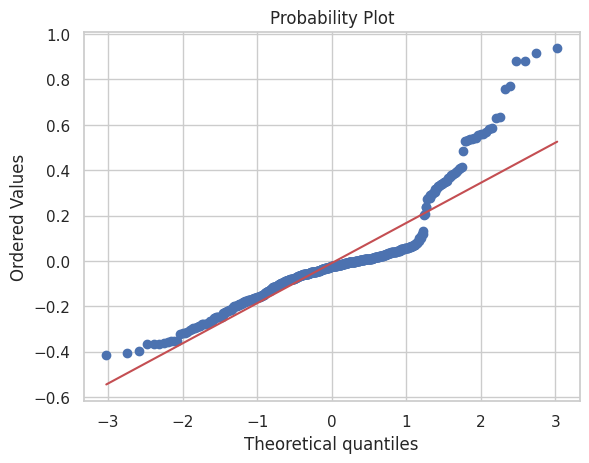

In [ ]:

import numpy as np
import pylab
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

The residuals are approximately Normally distributed.


**2. Polynomial Regression Analysis**:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor2 = LinearRegression()
regressor2.fit(X_poly, y_train)

LinearRegression()

In [ ]:

y_pred2 = regressor2.predict(poly_reg.transform(X_test))
r2_poly=r2_score(y_test, y_pred2)
print("R2 :" ,r2_poly)

R2 : 0.8396522544367513


**3. Decision Tree Regression:**

In [ ]:

from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor(random_state = 0)
regressor3.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred3 = regressor3.predict(X_test)
r2_dtr=r2_score(y_test, y_pred3)
print("R2 :" ,r2_dtr)

R2 : 0.9338723610661421


**4. Random Forest Regression:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor4 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor4.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:

y_pred4 = regressor4.predict(X_test)
r2_rfr=r2_score(y_test, y_pred4)
print("R2 :" ,r2_rfr)

R2 : 0.9543804024469397


**Feature Importance of Random forest Regression:**

In [ ]:
feature_importance=regressor4.feature_importances_
feature_importance

array([0.00969134, 0.00777066, 0.00581949, 0.00435897, 0.36529254,
       0.01120099, 0.09684764, 0.05185161, 0.44716676])

In [ ]:
feature_importance=regressor4.feature_importances_
features =['region_southwest','region_southeast','region_northwest','region_northeast','bmi','children','age','sex','smoker']
pd.Series(feature_importance,index=features)


region_southwest    0.009691
region_southeast    0.007771
region_northwest    0.005819
region_northeast    0.004359
bmi                 0.365293
children            0.011201
age                 0.096848
sex                 0.051852
smoker              0.447167
dtype: float64

Plotting the Important feature in bar plot

<BarContainer object of 9 artists>

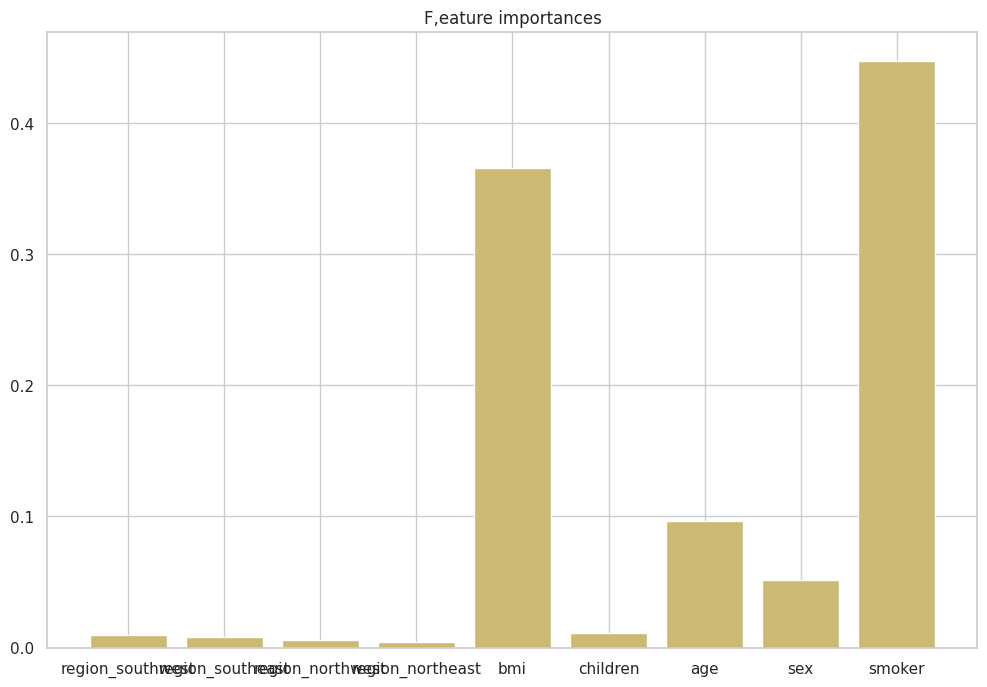

In [ ]:

fig=plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.title("F,eature importances")
plt.bar(features, feature_importance,
       color="y")

**5. Support Vector Regression:**

In [ ]:

from sklearn.svm import SVR
regressor5 = SVR(kernel = 'linear')
regressor5.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:

y_pred5 = regressor5.predict(X_test)
r2_svm=r2_score(y_test, y_pred5)
print("R2 :" ,r2_svm)


R2 : 0.7731603236550506


# **Conclusion Part:**

Outcomes:

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children.
Random Forest Regressor gives us the highest accuray among the Regression Models.

Chalanges that I have faced:

The target variable which is 'charges' is highly positively skewed, so to remove the skewness, I have to use Log transformation of that variable.
In our set of features, two of the variables have moderate Multicoliearity which may be a result of sample phenomenon of Multicolinearity, as we have only 1338 observations in our dataset.
Final Verdict:

Random forest Regressor is the best fit model for this dataset and Smoking has the highest impact on medical cost. If we add some more data then we may get more accuracy.

                                                               **THANK YOU**